In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Файл(ы) "0.jpg" размером 4415 байт загружен(ы)
Файл(ы) "1.jpg" размером 2738 байт загружен(ы)
Файл(ы) "2.jpg" размером 4650 байт загружен(ы)
Файл(ы) "3.jpg" размером 4523 байт загружен(ы)
Файл(ы) "4.jpg" размером 6189 байт загружен(ы)
Файл(ы) "5.jpg" размером 6925 байт загружен(ы)
Файл(ы) "6.jpg" размером 9374 байт загружен(ы)
Файл(ы) "7.jpg" размером 4673 байт загружен(ы)
Файл(ы) "8.jpg" размером 5407 байт загружен(ы)
Файл(ы) "9.jpg" размером 5344 байт загружен(ы)


In [2]:
#Подключение библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [3]:
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Список цифр от 0 до 9
classes = ['ноль', 'один', 'два', 'три', 'четыре', 'пять', 'шесть', 'семь', 'восемь', 'девять']

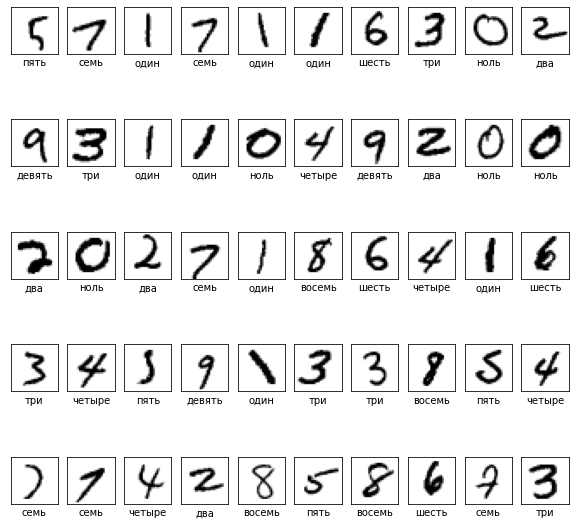

In [5]:
#Вывод по 10 изображений в каждой строке
plt.figure(figsize=(10,10))
for i in range(100,150): #Цикл от 100 до 150
    plt.subplot(5,10,i-100+1) #(кол-во строк, кол-во столбцов, положение элемента)
    plt.xticks([]) #убираем разметку по оси Ox
    plt.yticks([]) #убираем разметку по оси Oy
    plt.grid(False) #убираем видимость сетки
    plt.imshow(x_train[i], cmap=plt.cm.binary) #вывод изображения
    plt.xlabel(classes[y_train[i]]) #подпись

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

In [8]:
n = 0

In [9]:
print(y_train[n])

5


In [10]:
#Преобразует вектор класса (целые числа) в двоичную классную матрицу (вектор класса, общее кол-во классов)
y_train = utils.to_categorical(y_train, 10)

In [11]:
#Преобразует вектор класса (целые числа) в двоичную классную матрицу (вектор класса, общее кол-во классов)
y_test = utils.to_categorical(y_test, 10)

In [12]:
#Результат - число 5 (нулевой элемент массива y_train)
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 512 нейронов, 784 входа в каждый нейрон
model.add(Dense(512, input_dim=784, activation="relu"))
# полносвязный слой, 512 нейронов
model.add(Dense(512, input_dim=512, activation="relu"))
# полносвязный слой, 512 нейронов
model.add(Dense(512, input_dim=512, activation="relu"))
# полносвязный слой, 512 нейронов
model.add(Dense(512, input_dim=512, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [27]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(x_train, y_train, #обучающая модель, тест модель
                    batch_size=128, #кол-во задач за раз
                    epochs=25, #кол-во проходов по всем параметрам
                    validation_split=0.1, # Доля валидационной выборки для контроля переобучения
                    verbose=1) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/25
422/422 [==============================] - 3s 7ms/step - loss: 1.2921 - accuracy: 0.6912 - val_loss: 0.4737 - val_accuracy: 0.8793
Epoch 2/25
422/422 [==============================] - 2s 6ms/step - loss: 0.4282 - accuracy: 0.8811 - val_loss: 0.2941 - val_accuracy: 0.9218
Epoch 3/25
422/422 [==============================] - 2s 6ms/step - loss: 0.3283 - accuracy: 0.9064 - val_loss: 0.2488 - val_accuracy: 0.9317
Epoch 4/25
422/422 [==============================] - 2s 6ms/step - loss: 0.2847 - accuracy: 0.9179 - val_loss: 0.2167 - val_accuracy: 0.9383
Epoch 5/25
422/422 [==============================] - 3s 6ms/step - loss: 0.2553 - accuracy: 0.9263 - val_loss: 0.1980 - val_accuracy: 0.9427
Epoch 6/25
422/422 [==============================] - 3s 6ms/step - loss: 0.2318 - accuracy: 0.9334 - val_loss: 0.1828 - val_accuracy: 0.9487
Epoch 7/25
422/422 [==============================] - 3s 6ms/step - loss: 0.2125 - accuracy: 0.9388 - val_loss: 0.1672 - val_accuracy: 0.9552
Epoch 

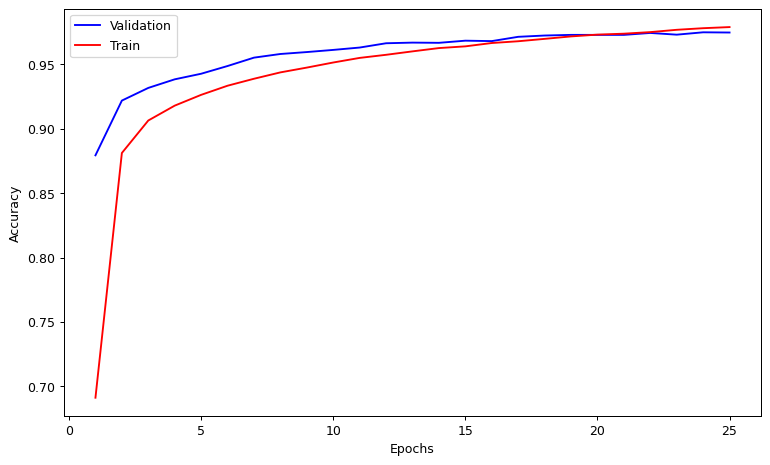

In [29]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0947 - accuracy: 0.9711


In [31]:
#Вывод доли верных ответов
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 97.11


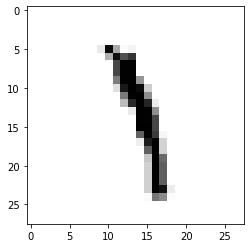

Результат распознавания:
 [[2.3917961e-05 8.3510715e-01 3.0360938e-04 2.1884691e-02 6.5962276e-03
  6.2371744e-03 1.8351788e-04 1.5743652e-02 4.3433402e-02 7.0486769e-02]]
Номер класса: 1
Название класса: один


In [32]:
n_rec = 96
#Вывод изображения размером 28 на 28
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
#Меняем размерность изображения и нормализуем его
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
#Запускаем распознавание
prediction = model.predict(x)
#Результат распознавания
print("Результат распознавания:\n", prediction)
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

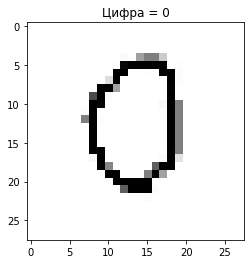

Результат распознавания:
 [[8.3638632e-01 3.6888244e-04 7.1635419e-03 7.1443571e-04 5.1878477e-03
  4.8709642e-03 7.1277201e-02 4.3382337e-03 6.6447589e-03 6.3047789e-02]]
Номер класса: 0
Название класса: ноль
ВЫВОД: картинка распознается


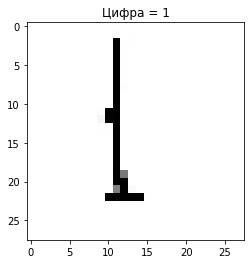

Результат распознавания:
 [[0.08851838 0.00117597 0.0127437  0.0010566  0.01935958 0.19527857
  0.6386892  0.00223748 0.0354695  0.00547101]]
Номер класса: 6
Название класса: шесть
ВЫВОД: картинка НЕ распознается


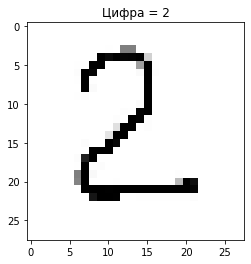

Результат распознавания:
 [[1.1702495e-03 4.3687988e-02 7.7329421e-01 6.8046786e-02 1.5308085e-04
  1.5615802e-03 3.8373880e-02 1.7944432e-05 7.3682167e-02 1.2062083e-05]]
Номер класса: 2
Название класса: два
ВЫВОД: картинка распознается


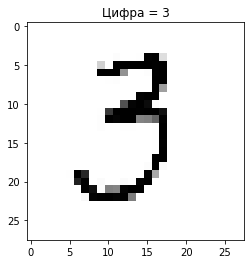

Результат распознавания:
 [[4.5853438e-05 3.0546519e-03 9.1448404e-05 9.8378921e-01 4.8213988e-06
  1.0150557e-02 2.8670645e-06 2.1348929e-04 1.0279203e-03 1.6192900e-03]]
Номер класса: 3
Название класса: три
ВЫВОД: картинка распознается


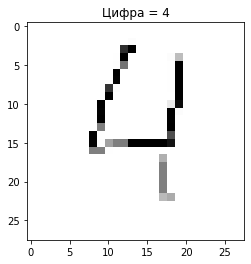

Результат распознавания:
 [[0.01741275 0.00939039 0.01978363 0.02513977 0.5294076  0.07529179
  0.03597942 0.00998565 0.13305716 0.14455181]]
Номер класса: 4
Название класса: четыре
ВЫВОД: картинка распознается


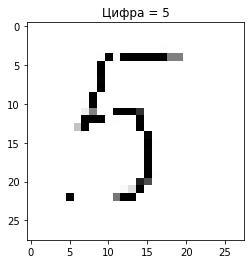

Результат распознавания:
 [[0.00102403 0.02896326 0.00169437 0.060024   0.0030445  0.843135
  0.01920833 0.00313076 0.03753093 0.00224491]]
Номер класса: 5
Название класса: пять
ВЫВОД: картинка распознается


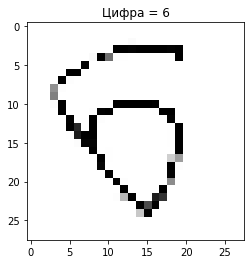

Результат распознавания:
 [[0.3299091  0.04349998 0.07831582 0.0265221  0.02567714 0.06736961
  0.13960017 0.27384198 0.00530011 0.00996407]]
Номер класса: 0
Название класса: ноль
ВЫВОД: картинка НЕ распознается


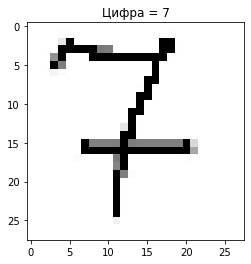

Результат распознавания:
 [[1.62373926e-03 5.08175511e-03 7.32160866e-01 2.41428185e-02
  6.04400644e-04 1.07763265e-03 1.09258756e-01 1.03517821e-04
  1.25895664e-01 5.09003949e-05]]
Номер класса: 2
Название класса: два
ВЫВОД: картинка НЕ распознается


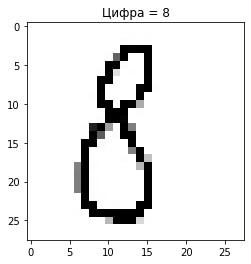

Результат распознавания:
 [[1.3788154e-04 3.9299633e-03 1.7248431e-03 3.8709930e-01 1.2862161e-04
  4.3413427e-01 1.6934602e-04 1.1321661e-04 1.7241795e-01 1.4463469e-04]]
Номер класса: 5
Название класса: пять
ВЫВОД: картинка НЕ распознается


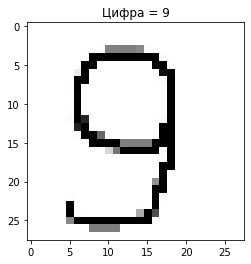

Результат распознавания:
 [[7.0785129e-05 5.3845422e-04 1.4611147e-03 9.4309229e-01 4.1173901e-03
  4.7873147e-04 1.3803713e-05 7.2249938e-03 7.4760388e-03 3.5526410e-02]]
Номер класса: 3
Название класса: три
ВЫВОД: картинка НЕ распознается


In [33]:
#Список с названиями изображений
pictures = ['0.jpg','1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg']
#Список с изображениями
img_path = []
#Цикл для обработки изображениий
for i in range (10):
  #Загружаем картинку из файла
  img_path.append(pictures[i])
  #plt.subplot2grid((2,5), (0,i))
  img = image.load_img(img_path[i], target_size=(28, 28), color_mode = "grayscale")
  plt.title('Цифра = ' +  str(i))
  #Вывод
  plt.imshow(img.convert('RGBA'))
  plt.show()
  ##################################################################
  #Преобразуем картинку для обработки нейронной сетью
  # Преобразуем картинку в массив
  x = image.img_to_array(img)
  # Меняем форму массива в плоский вектор
  x = x.reshape(1, 784)
  # Инвертируем изображение
  x = 255 - x
  # Нормализуем изображение
  x /= 255
  ##################################################################
  #Запускаем распознавание
  prediction = model.predict(x)
  #Результат распознавания
  print("Результат распознавания:\n", prediction)
  ##################################################################
  prediction = np.argmax(prediction)
  print("Номер класса:", prediction)
  print("Название класса:", classes[prediction])
  ##################################################################
  if (i == prediction):
    print("ВЫВОД: картинка распознается")
  else:
    print("ВЫВОД: картинка НЕ распознается")

Половина использованных картинок не распознается полносвязной нейросетью, особенно проблематичны для распознания цифры с округлыми изгибами и частями (6,8,9), еще не распознаны 1 и 7(7 похожа на 2) . При этом качество обучения полносвязной нейросети было высокое - 97%.

In [40]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 512 нейронов, 784 входа в каждый нейрон
model.add(Dense(512, input_dim=784, activation="sigmoid"))
# полносвязный слой, 512 нейронов
model.add(Dense(512, input_dim=512, activation="sigmoid"))
# полносвязный слой, 512 нейронов
model.add(Dense(512, input_dim=512, activation="sigmoid"))
# полносвязный слой, 512 нейронов
model.add(Dense(512, input_dim=512, activation="sigmoid"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [41]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
history = model.fit(x_train, y_train, #обучающая модель, тест модель
                    batch_size=128, #кол-во задач за раз
                    epochs=50, #кол-во проходов по всем параметрам
                    validation_split=0.1, # Доля валидационной выборки для контроля переобучения
                    verbose=1) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/50
422/422 [==============================] - 3s 7ms/step - loss: 0.7020 - accuracy: 0.7671 - val_loss: 0.2535 - val_accuracy: 0.9230
Epoch 2/50
422/422 [==============================] - 3s 6ms/step - loss: 0.2370 - accuracy: 0.9288 - val_loss: 0.1471 - val_accuracy: 0.9553
Epoch 3/50
422/422 [==============================] - 3s 6ms/step - loss: 0.1651 - accuracy: 0.9493 - val_loss: 0.1282 - val_accuracy: 0.9655
Epoch 4/50
422/422 [==============================] - 3s 6ms/step - loss: 0.1279 - accuracy: 0.9609 - val_loss: 0.1085 - val_accuracy: 0.9678
Epoch 5/50
422/422 [==============================] - 3s 6ms/step - loss: 0.1025 - accuracy: 0.9692 - val_loss: 0.1000 - val_accuracy: 0.9740
Epoch 6/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0828 - accuracy: 0.9748 - val_loss: 0.1008 - val_accuracy: 0.9712
Epoch 7/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0851 - val_accuracy: 0.9755
Epoch 

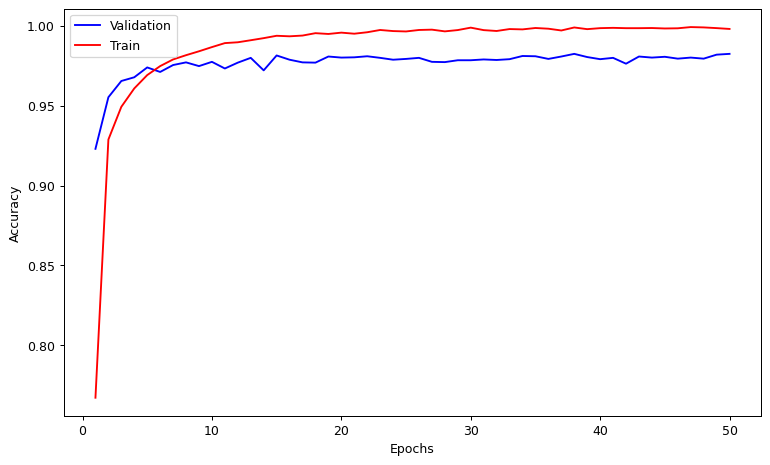

In [43]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.1104 - accuracy: 0.9803


In [45]:
#Вывод доли верных ответов
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 98.03


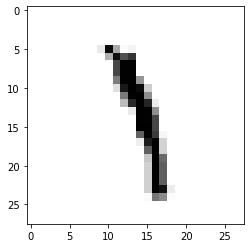

Результат распознавания:
 [[3.55150441e-05 1.03618644e-01 2.30786318e-05 5.29986282e-04
  9.39163752e-03 1.87832309e-04 6.59590782e-08 7.69662656e-05
  2.72164959e-03 8.83414567e-01]]
Номер класса: 9
Название класса: девять


In [46]:
n_rec = 96
#Вывод изображения размером 28 на 28
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
#Меняем размерность изображения и нормализуем его
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
#Запускаем распознавание
prediction = model.predict(x)
#Результат распознавания
print("Результат распознавания:\n", prediction)
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

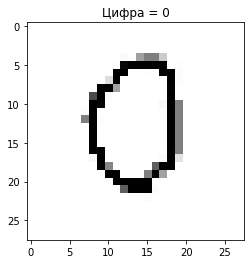

Результат распознавания:
 [[9.9813712e-01 9.4200186e-07 1.4393331e-03 2.0245988e-04 4.6139544e-07
  1.3289614e-06 9.5944279e-06 6.7515530e-06 1.2034516e-06 2.0085693e-04]]
Номер класса: 0
Название класса: ноль
ВЫВОД: картинка распознается


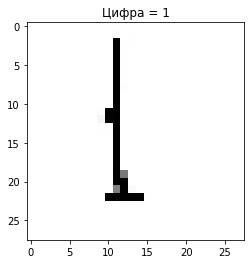

Результат распознавания:
 [[1.46832885e-04 1.16873225e-05 8.53376841e-05 3.08288982e-05
  9.69698795e-06 5.04154086e-01 4.94929790e-01 1.52495033e-06
  6.29412069e-04 7.65834329e-07]]
Номер класса: 5
Название класса: пять
ВЫВОД: картинка НЕ распознается


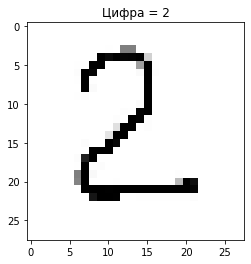

Результат распознавания:
 [[3.9795207e-09 1.2338972e-08 9.9999952e-01 2.8780019e-07 5.8387433e-09
  6.5182647e-12 9.8055182e-11 2.0237110e-07 1.5034338e-09 5.4662870e-09]]
Номер класса: 2
Название класса: два
ВЫВОД: картинка распознается


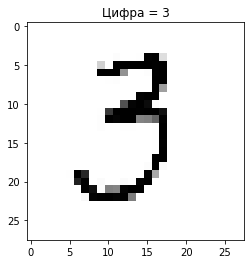

Результат распознавания:
 [[5.8373537e-09 1.2552421e-07 2.8449356e-06 9.9997509e-01 3.3995985e-08
  1.5133213e-05 1.0311139e-11 3.0613433e-07 5.9123789e-07 5.8832520e-06]]
Номер класса: 3
Название класса: три
ВЫВОД: картинка распознается


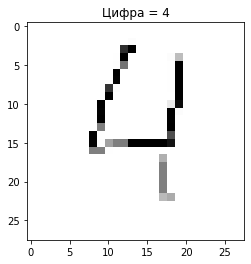

Результат распознавания:
 [[1.6007870e-06 3.2280106e-05 5.5812078e-04 1.3144234e-02 9.6003497e-01
  1.2472190e-03 3.2429184e-06 4.8460857e-05 1.3293944e-03 2.3600394e-02]]
Номер класса: 4
Название класса: четыре
ВЫВОД: картинка распознается


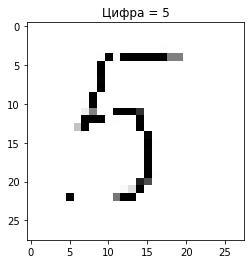

Результат распознавания:
 [[1.3360831e-06 2.3368020e-04 8.3584758e-04 2.4482775e-01 1.2135772e-05
  7.5400788e-01 1.1889314e-05 6.4639544e-06 4.6100140e-05 1.7033126e-05]]
Номер класса: 5
Название класса: пять
ВЫВОД: картинка распознается


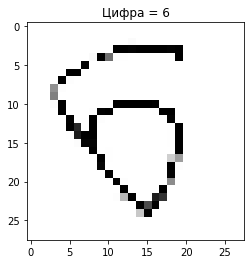

Результат распознавания:
 [[1.7797649e-01 1.2933236e-05 3.5251429e-05 1.8836619e-05 4.8279209e-05
  1.0173661e-03 8.2088757e-01 3.7898434e-07 2.6900079e-06 1.1000690e-07]]
Номер класса: 6
Название класса: шесть
ВЫВОД: картинка распознается


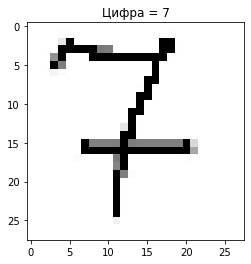

Результат распознавания:
 [[1.8699564e-05 2.0170461e-05 9.2481995e-01 3.2262564e-05 2.6254018e-04
  1.9172985e-06 7.4680373e-02 8.9006974e-08 1.6390361e-04 1.3741925e-08]]
Номер класса: 2
Название класса: два
ВЫВОД: картинка НЕ распознается


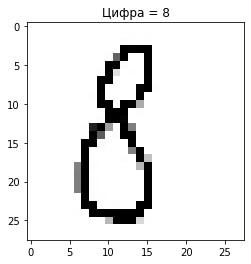

Результат распознавания:
 [[2.0306163e-07 1.4226342e-05 1.3879577e-04 9.6611160e-01 1.3101194e-07
  3.3720639e-02 4.3392109e-08 1.3170051e-06 6.3429966e-06 6.7380870e-06]]
Номер класса: 3
Название класса: три
ВЫВОД: картинка НЕ распознается


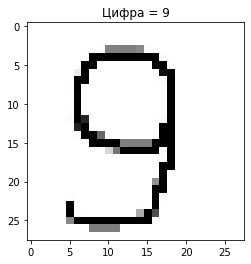

Результат распознавания:
 [[1.5858302e-09 1.5422263e-08 2.9219741e-06 9.9998260e-01 9.6970982e-09
  9.6567601e-07 4.5824894e-13 7.2834126e-07 3.5451712e-06 9.2466717e-06]]
Номер класса: 3
Название класса: три
ВЫВОД: картинка НЕ распознается


In [47]:
#Список с названиями изображений
pictures = ['0.jpg','1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg']
#Список с изображениями
img_path = []
#Цикл для обработки изображениий
for i in range (10):
  #Загружаем картинку из файла
  img_path.append(pictures[i])
  #plt.subplot2grid((2,5), (0,i))
  img = image.load_img(img_path[i], target_size=(28, 28), color_mode = "grayscale")
  plt.title('Цифра = ' +  str(i))
  #Вывод
  plt.imshow(img.convert('RGBA'))
  plt.show()
  ##################################################################
  #Преобразуем картинку для обработки нейронной сетью
  # Преобразуем картинку в массив
  x = image.img_to_array(img)
  # Меняем форму массива в плоский вектор
  x = x.reshape(1, 784)
  # Инвертируем изображение
  x = 255 - x
  # Нормализуем изображение
  x /= 255
  ##################################################################
  #Запускаем распознавание
  prediction = model.predict(x)
  #Результат распознавания
  print("Результат распознавания:\n", prediction)
  ##################################################################
  prediction = np.argmax(prediction)
  print("Номер класса:", prediction)
  print("Название класса:", classes[prediction])
  ##################################################################
  if (i == prediction):
    print("ВЫВОД: картинка распознается")
  else:
    print("ВЫВОД: картинка НЕ распознается")

При смене конфигурации полносвязной нейронной сети результат получился немного лучше, неверно определены только 4 числа, при доле верных ответов 98%. Также как и в первом случае не распознаны цифры 8,9(похожи на 3) и 1,7(7 похожа на 2).